## Observations and Insights

## Dependencies and starter code

In [197]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_metadata)
results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged=pd.merge(mouse_data, results, on="Mouse ID",how='outer')
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [198]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
#each regimen
regimen=merged.groupby('Drug Regimen')
meanvolume=regimen["Tumor Volume (mm3)"].mean()
medianvolume=regimen["Tumor Volume (mm3)"].median()
variancevolume=regimen["Tumor Volume (mm3)"].var()
SDvolume=regimen["Tumor Volume (mm3)"].std()
SEMvolume=regimen["Tumor Volume (mm3)"].sem()

volumedf=pd.DataFrame([meanvolume,medianvolume,variancevolume,SDvolume,SEMvolume],
                     ["Mean Volume","Median Volume","Volume Variance","Volume Standard Deviation","Volume Standard Error"])

print:("Summary of Tumor Volume By Drug Regimen")
volumedf

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Mean Volume,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.322552,40.216745,54.233149,53.236507
Median Volume,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.854632,40.673236,52.431737,51.818479
Volume Variance,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,42.351070,23.486704,59.450562,48.533355
Volume Standard Deviation,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.507770,4.846308,7.710419,6.966589
Volume Standard Error,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.512884,0.320955,0.573111,0.516398


## Bar plots

Text(0.5, 1.0, 'Number of Measurements per Drug Regimen')

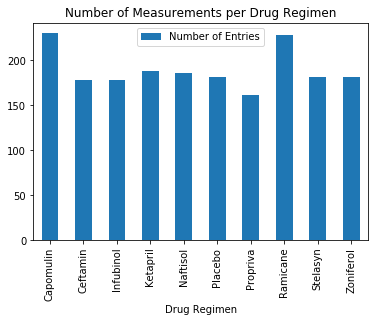

In [199]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
cap=len(merged.loc[merged["Drug Regimen"]=="Capomulin"])
cef=len(merged.loc[merged["Drug Regimen"]=="Ceftamin"])
inf=len(merged.loc[merged["Drug Regimen"]=="Infubinol"])
ket=len(merged.loc[merged["Drug Regimen"]=="Ketapril"])
naf=len(merged.loc[merged["Drug Regimen"]=="Naftisol"])
pla=len(merged.loc[merged["Drug Regimen"]=="Placebo"])
pro=len(merged.loc[merged["Drug Regimen"]=="Propriva"])
ram=len(merged.loc[merged["Drug Regimen"]=="Ramicane"])
ste=len(merged.loc[merged["Drug Regimen"]=="Stelasyn"])
zon=len(merged.loc[merged["Drug Regimen"]=="Zoniferol"])

drugs=['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
frequency=[cap,cef,inf,ket,naf,pla,pro,ram,ste,zon]

drug_dict={"Drug Regimen":pd.Series(drugs),"Number of Entries":pd.Series(frequency)}
data_points=pd.DataFrame(drug_dict)

graph=data_points.plot.bar(x="Drug Regimen",y="Number of Entries")
graph.set_title('Number of Measurements per Drug Regimen')

Text(0, 0.5, 'Number of Entries')

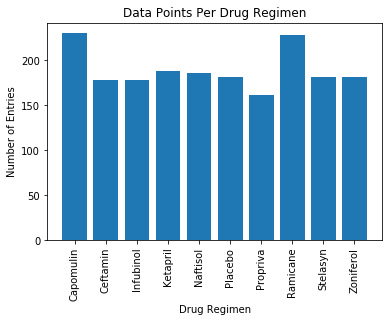

In [200]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(drugs,frequency)
plt.xticks(rotation='vertical')
plt.title("Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Entries")

## Pie plots



In [270]:
#To find the sex of each individual mouse, disregarding repeated 'Sex' entries per mouse
merged2 = pd.DataFrame(merged.groupby(['Mouse ID']).apply(lambda x: x['Sex'].value_counts().reset_index()))
merged2=merged2.rename(columns={'index':'Sex','Sex':'Count'})
sex=merged2['Sex'].value_counts()
sex

Male      125
Female    124
Name: Sex, dtype: int64

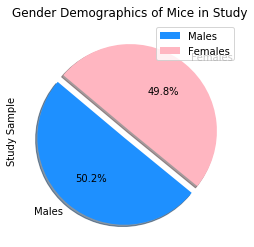

In [202]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
malemice=125
femalemice=124

labels=["Males","Females"]
sizes=[malemice,femalemice]
colors=["dodgerblue","lightpink"]
gender=pd.DataFrame({"Gender":pd.Series(labels),"Study Sample":pd.Series(sizes)})
gender=gender.set_index("Gender")
gender.plot.pie(y="Study Sample",autopct='%1.1f%%',colors=colors,
                shadow=True,startangle=140,title="Gender Demographics of Mice in Study", explode=(.1,0))

Text(0.5, 1.0, 'Gender Demographics of Mice')

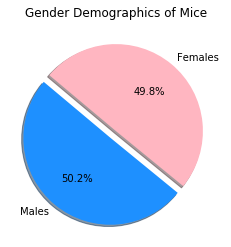

In [203]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes,labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, explode=(.1,0))
plt.title("Gender Demographics of Mice")

## Quartiles, outliers and boxplots


In [338]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
ftumor = merged.groupby(["Mouse ID"]).max()
ftumor = ftumor.reset_index()
fmerge = ftumor[['Mouse ID','Timepoint']].merge(merged,on=['Mouse ID','Timepoint'],how="left")
fmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [330]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin final tumor volume quartiles and outliers 
fcap=fmerge[fmerge['Drug Regimen']=='Capomulin']
capvol=fcap['Tumor Volume (mm3)']
capqs = capvol.quantile([.25,.5,.75])
capq1 = capqs[0.25]
capq3 = capqs[0.75]
capiqr = capq3-capq1
capuplim=capq3+(1.5*capiqr)
caplowlim=capq1-(1.5*capiqr)
capoutliers=[value for value in capvol if (value>capuplim) | (value<caplowlim)]
print(f"Outliers in the Capomulin group: {capoutliers}")

Outliers in the Capomulin group: []


In [331]:
#Ceftamin final tumor volume quartiles and outliers 
fcef=fmerge[fmerge['Drug Regimen']=='Ceftamin']
cefvol=fcef['Tumor Volume (mm3)']
cefqs = cefvol.quantile([.25,.5,.75])
cefq1 = cefqs[0.25]
cefq3 = cefqs[0.75]
cefiqr = cefq3-cefq1
cefuplim=cefq3+(1.5*cefiqr)
ceflowlim=cefq1-(1.5*cefiqr)
cefoutliers=[value for value in cefvol if(value>cefuplim) | (value<ceflowlim)]
print(f"Outliers in the Ceftamin group: {cefoutliers}" )

Outliers in the Ceftamin group: []


In [332]:
#Infubinol final tumor volume quartiles and outliers 
finf=fmerge[fmerge['Drug Regimen']=='Infubinol']
infvol=finf['Tumor Volume (mm3)']
infqs = infvol.quantile([.25,.5,.75])
infq1 = infqs[0.25]
infq3 = infqs[0.75]
infiqr = infq3-infq1
infuplim=infq3+(1.5*infiqr)
inflowlim=infq1-(1.5*infiqr)
infoutliers=[value for value in infvol if (value>infuplim) | (value<inflowlim)]
print(f"Outliers in the Infubinol group: {infoutliers}")

Outliers in the Infubinol group: [36.321345799999996]


In [333]:
#Ramicane final tumor volume quartiles and outliers 
fram=fmerge[fmerge['Drug Regimen']=='Ramicane']
ramvol=fram['Tumor Volume (mm3)']
ramqs = ramvol.quantile([.25,.5,.75])
ramq1 = ramqs[0.25]
ramq3 = ramqs[0.75]
ramiqr = ramq3-ramq1
ramuplim=ramq3+(1.5*ramiqr)
ramlowlim=ramq1-(1.5*ramiqr)
ramoutliers=[value for value in ramvol if (value>ramuplim) | (value<ramlowlim)]
print(f"Outliers in the Ramicane group: {ramoutliers}")

Outliers in the Ramicane group: []


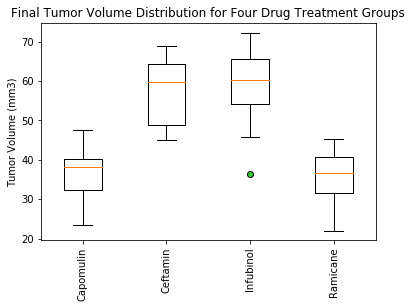

In [345]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [capvol, cefvol, infvol, ramvol]
fig1, ax1 = plt.subplots()
flierprops=dict(markerfacecolor='limegreen', marker='o')
ax1.boxplot(data, flierprops=flierprops)
plt.ylabel('Tumor Volume (mm3)')
plt.title('Final Tumor Volume Distribution for Four Drug Treatment Groups')
plt.xticks([1, 2, 3, 4], ['Capomulin','Ceftamin','Infubinol','Ramicane'], rotation='vertical')
plt.show()

## Line and scatter plots

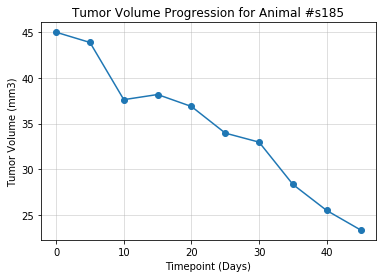

In [335]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185=merged.loc[merged['Mouse ID']=='s185']
s185.head(10)

timepoint=[value for value in s185['Timepoint']]
volume=[value for value in s185['Tumor Volume (mm3)']]

plt.plot(timepoint,volume, marker='o')
plt.title('Tumor Volume Progression for Animal #s185')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(alpha=.5)

Text(0, 0.5, 'Average Tumor Volume (mm3)')

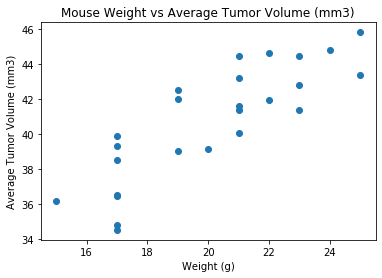

In [336]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df=merged.loc[merged['Drug Regimen']=='Capomulin']
cap_df=cap_df[['Mouse ID','Drug Regimen','Weight (g)','Tumor Volume (mm3)']]
cap_group=cap_df.groupby('Mouse ID').mean()

weight=cap_group['Weight (g)']
tvolume=cap_group['Tumor Volume (mm3)']

plt.scatter(weight,tvolume)
plt.title('Mouse Weight vs Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

y = 0.95x + 21.55
R2= 0.8419363424694718, p-value= 1.3225722434712642e-07


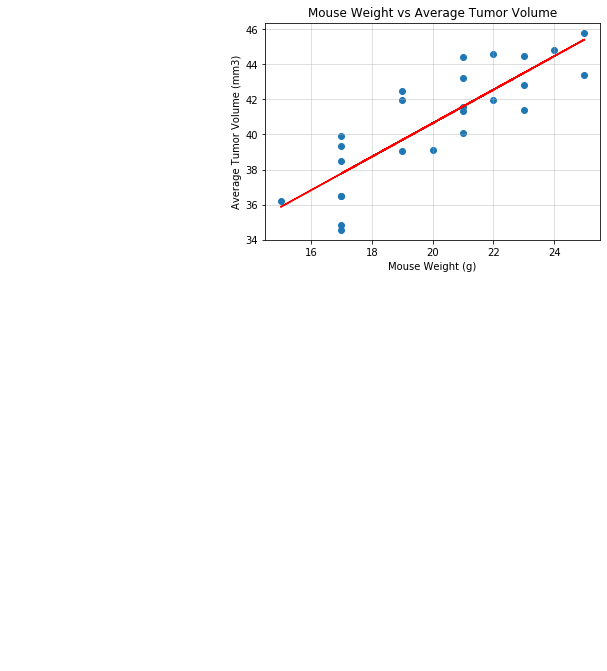

In [315]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor
#volume for the Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, tvolume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tvolume)
plt.plot(weight,regress_values,"r-")
print(line_eq)
correlation=st.pearsonr(weight,tvolume)
print(f"R2= {rvalue}, p-value= {pvalue}")
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(alpha=.5)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()